# Exp1 大津阈值法
通过实验显示 ...

In [56]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

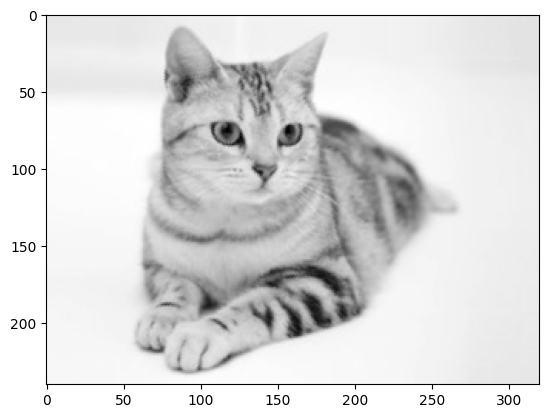

In [57]:
original = cv.imread("demo3.jpg",0)
# 灰度处理图片
img = cv.cvtColor(original,cv.COLOR_BAYER_BG2GRAY)
plt.imshow(img,"gray")

(array([1.000e+00, 3.000e+00, 0.000e+00, 1.000e+00, 3.000e+00, 3.000e+00,
        1.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 4.000e+00, 5.000e+00, 0.000e+00, 3.000e+00, 4.000e+00,
        4.000e+00, 4.000e+00, 1.000e+01, 1.400e+01, 5.000e+00, 1.300e+01,
        7.000e+00, 1.200e+01, 1.200e+01, 1.500e+01, 1.700e+01, 1.100e+01,
        0.000e+00, 1.500e+01, 1.500e+01, 1.800e+01, 1.600e+01, 1.700e+01,
        2.100e+01, 2.000e+01, 1.600e+01, 1.500e+01, 2.100e+01, 1.900e+01,
        1.700e+01, 2.900e+01, 2.800e+01, 0.000e+00, 2.500e+01, 2.000e+01,
        1.600e+01, 2.100e+01, 1.700e+01, 1.500e+01, 2.700e+01, 1.800e+01,
        1.600e+01, 1.400e+01, 1.400e+01, 1.800e+01, 1.500e+01, 1.700e+01,
        0.000e+00, 2.700e+01, 1.400e+01, 1.200e+01, 2.600e+01, 2.900e+01,
        2.900e+01, 1.300e+01, 2.000e+01, 2.000e+01, 2.000e+01, 2.800e+01,
        2.500e+01, 1.600e+01, 3.800e+01, 0.000e+00, 3.500e+01, 3.900e+01,
        4.600e+01, 3.400e+01, 4.300e+0

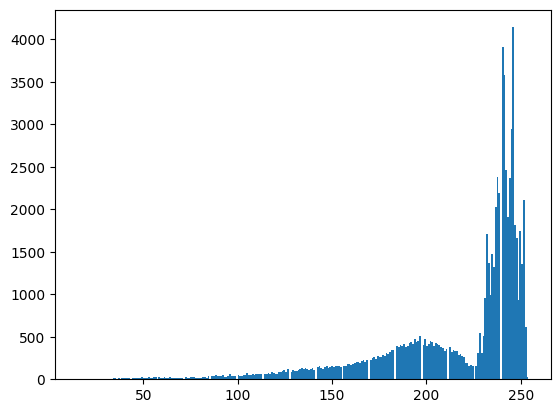

In [58]:
plt.hist(img.ravel(), 256)

OTSU Threshold / 大津法阈值 : 197.0


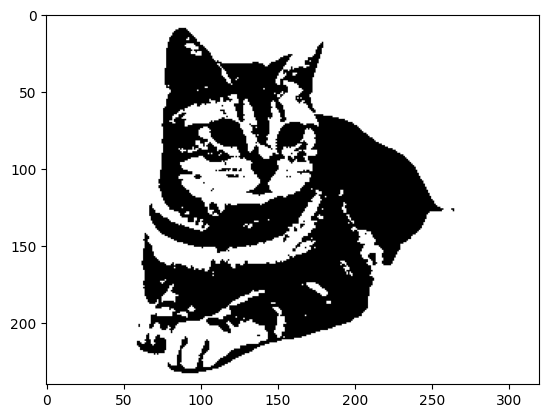

In [59]:
# 使用 OpenCV 调库
ret,threshold = cv.threshold(img,0,255,cv.THRESH_OTSU)
plt.imshow(threshold,"gray")
print("OTSU Threshold / 大津法阈值 : " + str(ret))

In [60]:
# 自己编写的版本
def otsu_fun(gray_img):
    # 得到图形的长宽
    h = gray_img.shape[0]
    w = gray_img.shape[1]
    # 灰度阈值
    threshold_t = 0
    t = 0
    max_g = 0
    # 遍历每一个灰度层
    # 方差越大，相关性越低，黑白越分明，遍历图像，找到灰度对应的最大的方差，就是大津法阈值。
    for t in range(0,255):
        # 小于阈值的像素（前景）
        n0 = gray_img[np.where(gray_img < t)]
        # 大于等于阈值的像素（背景）
        n1 = gray_img[np.where(gray_img >= t)]
        # 前景比例
        w0 = len(n0)/(h*w)
        # 背景比例
        w1 = len(n1)/(h*w)
        # 前景平均灰度
        u0 = np.mean(n0) if len(n0)>0 else 0
        # 背景平均灰度
        u1 = np.mean(n1) if len(n1)>0 else 0
        # 类间方差
        g = w0*w1*(u0-u1)**2
        if g>max_g :
            threshold_t = t
            max_g = g
    # 得到阈值后，通过阈值处理图像
    gray_img[gray_img<threshold_t] = 0
    gray_img[gray_img>threshold_t] = 255
    return threshold_t,gray_img

OTSU Threshold / 大津法阈值 : 198


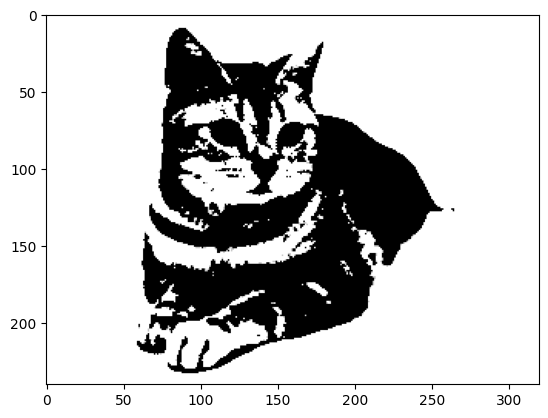

In [61]:
img = cv.cvtColor(original,cv.COLOR_BAYER_BG2GRAY)
ret_t,img_re = otsu_fun(img)
plt.imshow(img_re,"gray")
print("OTSU Threshold / 大津法阈值 : " + str(ret_t))

# Exp2 傅立叶描述子
描述闭合曲线形状
0～9 数字的识别，计算识别率

In [62]:
from cv2 import GaussianBlur, Mat, contourArea,CV_8SC2, sqrt
from numpy import *
# 最外侧轮廓对应的数组标

def picGenerate(img_path):
    o_index = list()
    idex = 0
    # 提取图像轮廓
    img = cv.imread(img_path)
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    ret,binary = cv.threshold(gray,128,255,cv.THRESH_BINARY)
    # 找所有轮廓
    contours, hierarchy = cv.findContours(binary,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
    # 找外轮廓
    contours_outside, hierarchy_outside = cv.findContours(binary,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
    re = contours
    for i in range(0,len(contours)):
        for k in range(0,len(contours_outside)):
            if len(contours_outside[k]) == len(contours[i]):
                o_index.append(i)
    # print(o_index)
    # 计算面积最大的部分
    size_count_arr = list()
    for k in range(0,len(contours)):
        if k not in o_index:
            # 非外轮廓在图上标出
            cv.drawContours(img,contours,k,(0,0,255),3)
            size_count_arr.append([k,contourArea(contours[k])])
    # print(size_count_arr)
    idx = 0
    max_size = size_count_arr[idx][1]
    for m in range(0,len(size_count_arr)):
        if(size_count_arr[m][1] > max_size):
            idx = m
            max_size = size_count_arr[m][1]
    plt.imshow(img)
    use_index = size_count_arr[idx][0]
    # print(use_index)
    pass
    # 计算傅立叶描述子
    # 轮廓的实际描述子
    f = [0] * 9000
    # 归一化的描述子，取了前 15 个
    fd = [0]  * 16
    s = len(contours[use_index])
    # print(s)
    src_re = list()
    for u in range(0,s):
        sumx = 0.0
        sumy = 0.0
        for v in range(0,s):
            p = contours[use_index][v]
            x = p[0][0]
            y = p[0][1]
            sumx += x*np.cos(2*np.pi*u*v/s)+y*np.sin(2*np.pi*u*v/s)
            sumy += y*np.cos(2*np.pi*u*v/s)-x*np.sin(2*np.pi*u*v/s)
        r = list()
        r.append(sumx)
        r.append(sumy)
        src_re.append(r)
        f[u] = sqrt((sumx*sumx)+(sumy*sumy))
        f[0] = 0
    fd[0] = 0
    # 傅立叶描述子归一化
    for k in range(2,17):
        f[k] = f[k] / f[1]
        fd[k-1] = f[k]
    return fd

[0, 0.03015166475836868, 0.006336822733967527, 0.002783117975063938, 0.06229227459957872, 0.005584684385564461, 0.0295178605444641, 0.004693584187806616, 0.02302001805546465, 0.011284889349192804, 0.0017144439127192903, 0.0078027366205547675, 0.02431938021055281, 0.012327821915976988, 0.0011181440620084792, 0.0008336678186233083]


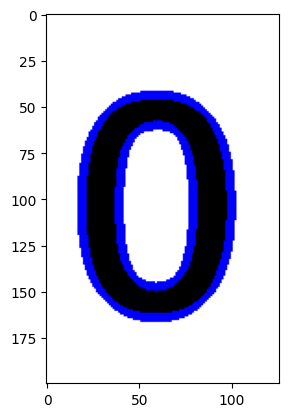

In [63]:
re_1 = picGenerate("0.png")
print(re_1)

[0, 0.030151664758368838, 0.006336822733967417, 0.0027831179750642267, 0.062292274599578666, 0.00558468438556395, 0.029517860544465244, 0.0046935841878062365, 0.023020018055465705, 0.011284889349191734, 0.001714443912718056, 0.007802736620554404, 0.02431938021055411, 0.012327821915976133, 0.0011181440620084198, 0.0008336678186236054]


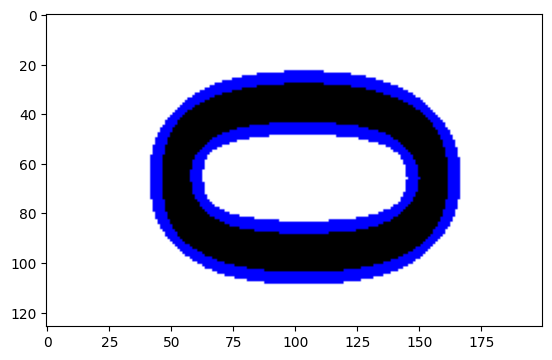

In [64]:
re_2 = picGenerate("0_invert.png")
print(re_2)

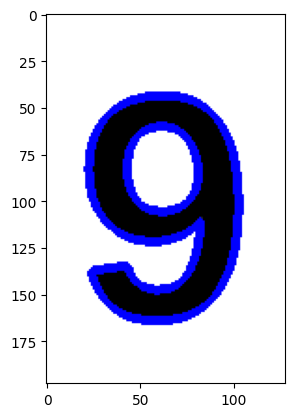

In [65]:
# 计算所有的数字（0~9）的傅立叶描述子
number_group = list()
for i in range(0,10):
    file_path = str(i)+".png"
    re = picGenerate(file_path)
    number_group.append(re)

In [66]:
print(number_group)

[[0, 0.03015166475836868, 0.006336822733967527, 0.002783117975063938, 0.06229227459957872, 0.005584684385564461, 0.0295178605444641, 0.004693584187806616, 0.02302001805546465, 0.011284889349192804, 0.0017144439127192903, 0.0078027366205547675, 0.02431938021055281, 0.012327821915976988, 0.0011181440620084792, 0.0008336678186233083], [0, 0.8338000746766528, 0.6937646641162881, 0.4675744460680104, 0.27682835712992554, 0.08971805689240366, 0.003390477956155111, 0.06271595302106145, 0.03772418958091957, 0.03867764535195527, 0.11471203544244023, 0.11809364687647804, 0.1336781787767186, 0.08211625946940303, 0.0496210141883127, 0.012467388820178298], [0, 0.6815811095329191, 0.17179639226410992, 0.10805113610412667, 0.0976192885674142, 0.07365763005526471, 0.052255729042962225, 0.05880344149650761, 0.0828094467673137, 0.093993615076118, 0.06827726642885344, 0.08032257931847024, 0.05381071531289039, 0.06928897283000188, 0.05987283918850487, 0.05017108397096382], [0, 0.45121364340424835, 0.068587

In [67]:
# 数字识别测试
def compareFunction(path):
    print("File : "+path)
    result = -1
    input_file_repo = picGenerate(path)
    qa = -1
    for k in range(0,10):
        # 当前比较数字：k
        current = number_group[k]
        v = 0
        for m in range(0,16):
            v += abs(current[m] - input_file_repo[m])
        print(str(k)+" : "+str(v))
        if(qa==-1 or qa>v):
            result = k
            qa = v
    print("Result: " + str(result))
    return result

File : demo/0.png
0 : 0.0
1 : 2.8433560424136135
2 : 1.5785301348265135
3 : 1.0225349952021368
4 : 1.6347470042530752
5 : 1.6430999887602045
6 : 0.9624722049146714
7 : 1.1909921356243367
8 : 0.3552910858286504
9 : 0.9772190676536344
Result: 0
File : demo/0_invert.png
0 : 8.885253643953206e-15
1 : 2.843356042413616
2 : 1.5785301348265137
3 : 1.0225349952021394
4 : 1.6347470042530756
5 : 1.6430999887602074
6 : 0.962472204914677
7 : 1.1909921356243371
8 : 0.3552910858286514
9 : 0.9772190676536359
Result: 0
File : demo/1.png
0 : 2.8433560424136135
1 : 0.0
2 : 1.6070151387071654
3 : 1.8863562685777953
4 : 1.3691450650915353
5 : 1.9329832716906796
6 : 1.8918939742347674
7 : 2.203410935807684
8 : 2.6467513283132966
9 : 1.9261071473702194
Result: 1
File : demo/2.png
0 : 1.5785301348265135
1 : 1.6070151387071654
2 : 0.0
3 : 1.0896747348927243
4 : 0.8066933719028859
5 : 0.611503991198302
6 : 0.7571476945386406
7 : 1.0432473942617668
8 : 1.4731163446278723
9 : 0.7527090290955076
Result: 2
File : 

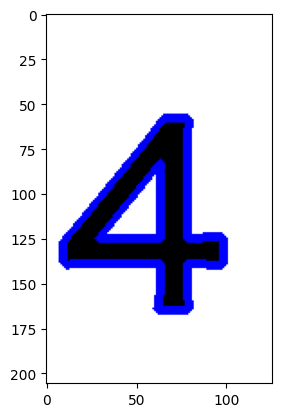

In [68]:
# 识别准确率测试
import csv
total = 0
right = 0
right_list = list()
wrong_list = list()
csv_reader = csv.reader(open("testlist.csv"))
for line in csv_reader:
    total += 1
    x = compareFunction(line[0])
    y = int(line[1])
    if(y==x):
        # 比较正确
        right += 1
        right_list.append(line[0]+" | "+str(x)+" | "+str(y))
    else:
        wrong_list.append(line[0]+" | "+str(x)+" | "+str(y))

In [69]:
print("Accuracy : "+str(right/total))
print("======== Right ========")
print("FilePath | Recognize | Answer")
for d in right_list:
    print(d)
print("======== Wrong ========")
print("FilePath | Recognize | Answer")
for d in wrong_list:
    print(d)

Accuracy : 0.8571428571428571
======== Right ========
FilePath | Recognize | Answer
demo/0.png | 0 | 0
demo/0_invert.png | 0 | 0
demo/1.png | 1 | 1
demo/2.png | 2 | 2
demo/3.png | 3 | 3
demo/4_alt.png | 4 | 4
demo/5.png | 5 | 5
demo/6.png | 6 | 6
demo/7.png | 7 | 7
demo/8.png | 8 | 8
demo/8_alt.png | 8 | 8
demo/9.png | 9 | 9
======== Wrong ========
FilePath | Recognize | Answer
demo/6_alt.png | 8 | 6
demo/4_alt2.png | 0 | 4


# Exp3 特征脸
显示出特征脸图像，每个脸对应的特征值

In [92]:
import os
def file_list_read(path):
    re = list()
    l = os.listdir(path)
    for f in l:
        if ".png" in f:
            re.append(path+"/"+f)
    return re
f_list = file_list_read("face")
print(f_list)

['face/8.png', 'face/9.png', 'face/14.png', 'face/15.png', 'face/16.png', 'face/12.png', 'face/13.png', 'face/11.png', 'face/10.png', 'face/4.png', 'face/5.png', 'face/7.png', 'face/6.png', 'face/2.png', 'face/3.png', 'face/1.png']


In [93]:
import numpy as np
import cv2 as cv
IMAGE_SIZE = (50,50)

def load_image(filepath,size):
    img = cv.imread(filepath,cv.IMREAD_GRAYSCALE)
    img = cv.resize(img,IMAGE_SIZE)
    # 1-D
    img = img.reshape(img.size,1)
    return img

def create_image_matrix(file_list):
    re = []
    for i in range(0,len(file_list)):
        im = load_image(file_list[i],IMAGE_SIZE)
        re.append(im)
    re = np.array(re)
    re = re.reshape(re.shape[0],re.shape[1])
    return np.mat(re).T    

m = create_image_matrix(f_list)

In [56]:
from matplotlib.pyplot import axis

def eigenface_generate(matrix):
    mean_face = matrix.mean(axis=1)
    n = matrix - mean_face
    l = (n.T)*n
    # 求特征值，特征向量
    d,v = np.linalg.eig(l)
    list = []
    for i in range(n.shape[1]):
        if d[i] > 1:
            list.append(v[:,i])
    re_eig = np.mat(np.reshape(np.array(list),(-1,len(list))))
    eigenface = n * re_eig
    return eigenface,mean_face,n,d,v
e_face,e_face_img,e_alt,e_face_vec,v_face= eigenface_generate(m)
print(e_face.shape)
print(e_face_img.shape)
print(e_alt.shape)
print(e_face_vec.shape)
print(v_face.shape)

(2500, 15)
(2500, 1)
(2500, 16)
(16,)
(16, 16)


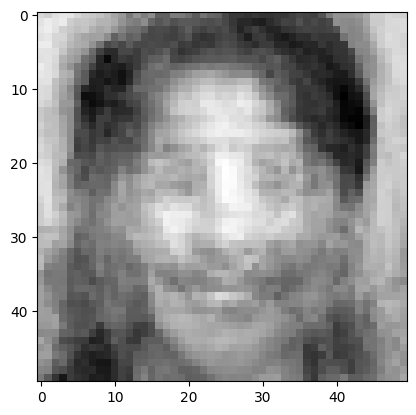

In [8]:
# 得到的平均脸
import matplotlib.pyplot as plt
e_im = e_face_img.reshape(IMAGE_SIZE)
plt.imshow(e_im,"gray")

(1, 2500)
[ 6.67104569e+07  2.37211326e+07  1.65979692e+07  1.14939170e+07
  9.04323715e+06 -8.23597385e-10  7.33989192e+06  6.64193684e+06
  5.69347765e+06  4.90715880e+06  1.44892444e+06  1.87277183e+06
  3.77577749e+06  2.35257268e+06  3.27145818e+06  2.87261991e+06]


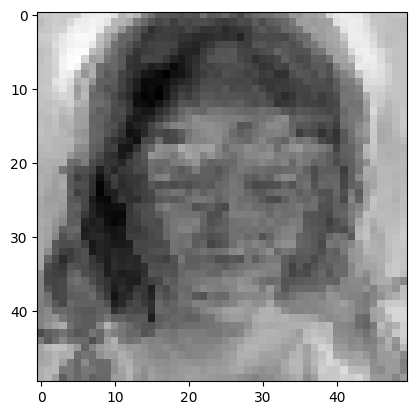

In [95]:
# 显示特征脸以及对应的特征向量
fa = e_face.T
print(fa[0].shape)
plt.imshow(fa[0].reshape(IMAGE_SIZE),"gray")
print(e_face_vec)